# Simulation: $\frac{1}{Z-R}$

Plot a heatmap and make conjectures about $\frac{1}{Z-R}$, where $R$ is either circularly symmetric or a specific circuarly symmetric distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def P2R(A, phi):
    return A * (np.cos(phi) + np.sin(phi)*1j)
def R2P(x):
    return np.absolute(x), np.angle(x)

In [3]:
def sample_cn(n_samples, std_dev=1):
    return np.random.normal(
        size=(n_samples, 2),
        scale=1,
    ).view(np.complex128)[:, 0]

In [4]:
def plot_c(samples, lim=None, n_bins=128, def_fig=True):
    """
    Plot a heatmap of a 1D numpy array of complex numbers.
    """
    if def_fig:
        plt.figure(figsize=(8,8))
    if lim == None:
        lim = (min(np.amin(samples.real), np.amin(samples.imag)), max(np.amax(samples.real), np.amax(samples.imag)))
    plt.hist2d(
        x=samples.real,
        y=samples.imag,
        bins=n_bins,
        range=(lim, lim),
    )

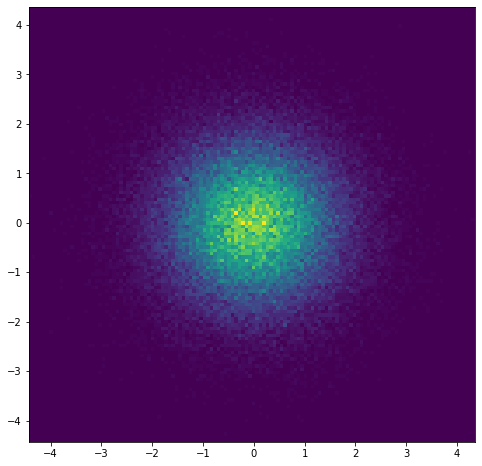

In [5]:
plot_c(sample_cn(100000))

In [6]:
def sample_r_cn(Z, n_samples=10000, std_dev=1):
    """
    Return a 1D numpy array of each of the samples transformed by R = CN(0, 1).
    """
    # sample R, 1D array of shape (n_samples,)
    R_sampled = sample_cn(n_samples, std_dev=std_dev)
    
    # calculate Z-R
    Z_sampled = np.full((n_samples,), Z, dtype=complex)
    Z_R_sampled = Z_sampled - R_sampled
    
    # calculate 1/(Z-R)
    Z_R_1_sampled = 1 / Z_R_sampled
    
    return Z_R_1_sampled

In [7]:
Zs = np.array([0, 3, 50, 1, P2R(1, 1), P2R(1, 2), P2R(0.95, np.pi), P2R(1.05, np.pi), P2R(10, np.pi)])

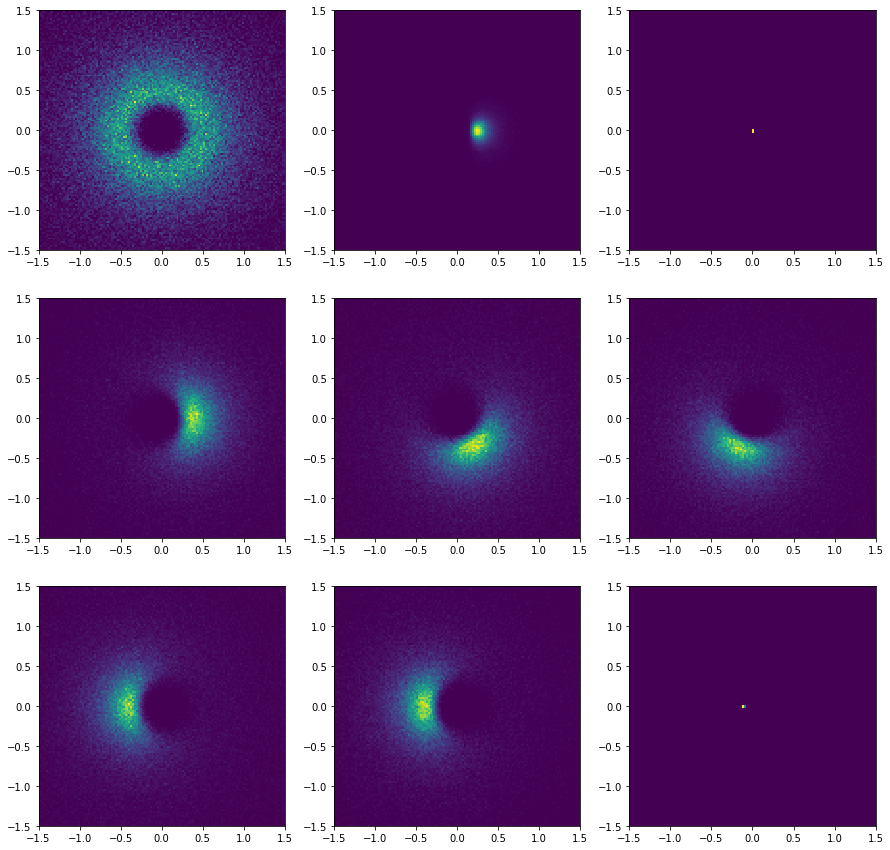

In [8]:
plt.figure(figsize=(15, 15))
for a in range(len(Zs)):
    plt.subplot(len(Zs) // 3, 3, a + 1)
    plot_c(sample_r_cn(Zs[a], 100000), lim=(-1.5, 1.5), def_fig=False)

In [9]:
def plot_r(samples, hlim=None, n_bins=128, def_fig=True):
    """
    Plot a heatmap of a 1D numpy array of real numbers.
    """
    if def_fig:
        plt.figure(figsize=(8,8))
    if hlim == None:
        hlim = np.amax(samples)
    plt.hist(
        samples,
        bins=n_bins,
        range=(0, hlim),
        density=True,
    )

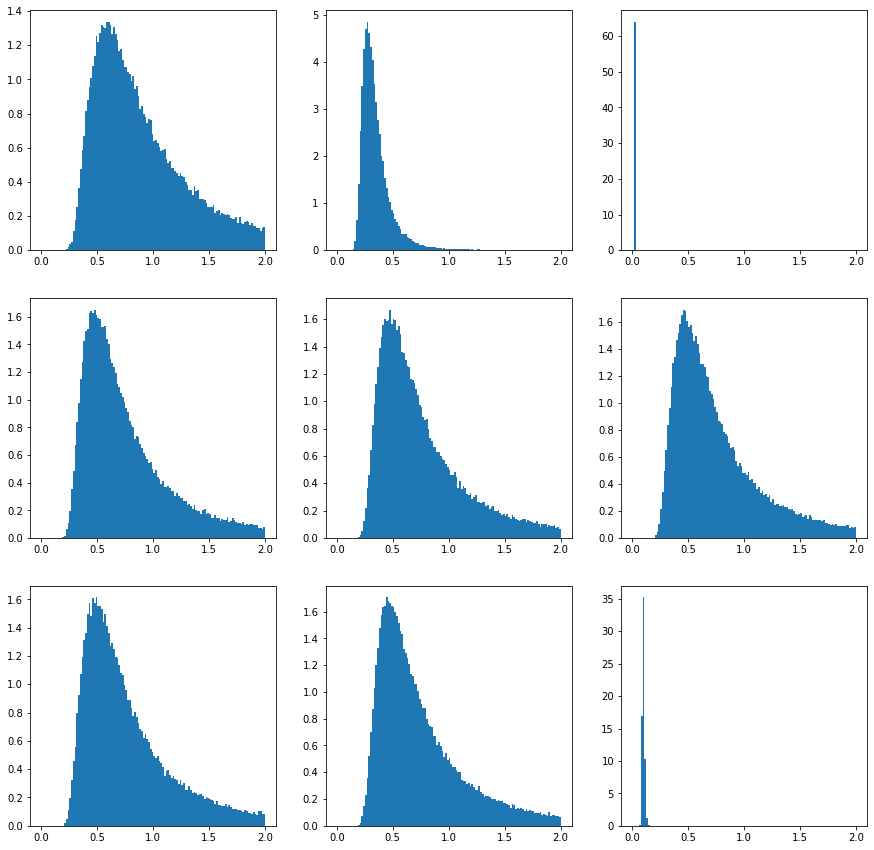

In [10]:
plt.figure(figsize=(15, 15))
for a in range(len(Zs)):
    plt.subplot(len(Zs) // 3, 3, a + 1)
    plot_r(np.absolute(sample_r_cn(Zs[a], 100000)), hlim=2, def_fig=False)

In [11]:
for a in range(len(Zs)):
    print("Z:", R2P(Zs[a]), ", expected value:", R2P(np.average(sample_r_cn(Zs[a], 1000000))))

Z: (0.0, 0.0) , expected value: (0.0038987185620054446, -2.2080750155762625)
Z: (3.0, 0.0) , expected value: (0.32928453816551473, 0.0007685237354812411)
Z: (50.0, 0.0) , expected value: (0.020000288687559136, -2.0192624687621085e-05)
Z: (1.0, 0.0) , expected value: (0.3897141210078786, -0.005392363338969248)
Z: (1.0, 1.0) , expected value: (0.3921332933981209, -0.9971960488710965)
Z: (1.0, 2.0) , expected value: (0.39389503759433303, -1.9980983558534917)
Z: (0.95, 3.141592653589793) , expected value: (0.38176878272465437, -3.1382088257413674)
Z: (1.05, 3.141592653589793) , expected value: (0.4040895398236888, 3.1415528369961767)
Z: (10.0, 3.141592653589793) , expected value: (0.10000838554649155, 3.1412913578223387)


The expected argument $arg(E[\frac{1}{Z-R}])$ is well-defined as $-arg(Z)$.

We also appear to have $\lim_{|Z|\to\infty}|E[\frac{1}{Z-R}]|=\frac{1}{|Z|}$. However, we are more interested in this quantity when $|Z|=1$, for that is what we're integrating over.

In [12]:
mag=0.39413196506825215
print(mag, 1/mag, mag/np.pi, mag/np.pi/np.pi, mag * np.pi, mag * np.pi * np.pi)
print(mag / norm.cdf(-1), norm.cdf(-mag))

0.39413196506825215 2.537221257420289 0.1254561009422691 0.03993391721199584 1.23820208600333 3.889926577047619
2.4842036762206865 0.34674180618952566


In [13]:
for a in range(len(Zs)):
    print("Z:", R2P(Zs[a]), ", expected value:", R2P(np.average(sample_r_cn(Zs[a], 1000000, std_dev=5))))

Z: (0.0, 0.0) , expected value: (0.0023887033115289275, 3.1412891723292033)
Z: (3.0, 0.0) , expected value: (0.32961575970102713, -0.00021895385437163434)
Z: (50.0, 0.0) , expected value: (0.02000056891079457, 1.4780571872982027e-06)
Z: (1.0, 0.0) , expected value: (0.3957408672904046, -0.002555147706225713)
Z: (1.0, 1.0) , expected value: (0.3935170944245822, -1.0041893629113892)
Z: (1.0, 2.0) , expected value: (0.39165459952214077, -2.0011732343055018)
Z: (0.95, 3.141592653589793) , expected value: (0.3841592413513811, -3.1377234287264324)
Z: (1.05, 3.141592653589793) , expected value: (0.4055059708487165, 3.1390340761366735)
Z: (10.0, 3.141592653589793) , expected value: (0.09999805671288792, -3.1414955652692007)


In [14]:
for a in range(len(Zs)):
    print("Z:", R2P(Zs[a]), ", expected value:", R2P(np.average(sample_r_cn(Zs[a], 1000000, std_dev=0.01))))

Z: (0.0, 0.0) , expected value: (0.001904820529884668, 1.5334697608918748)
Z: (3.0, 0.0) , expected value: (0.3297053790194433, -0.0017407922193636368)
Z: (50.0, 0.0) , expected value: (0.02000016793123523, -2.521106318471559e-05)
Z: (1.0, 0.0) , expected value: (0.39381184898831406, -4.575850228711576e-05)
Z: (1.0, 1.0) , expected value: (0.39738189590773854, -1.0021372788243437)
Z: (1.0, 2.0) , expected value: (0.39394501332048304, -1.991839510148546)
Z: (0.95, 3.141592653589793) , expected value: (0.3824681090561527, 3.1415170422630334)
Z: (1.05, 3.141592653589793) , expected value: (0.4016818626315243, -3.136814055522703)
Z: (10.0, 3.141592653589793) , expected value: (0.10000086036190298, 3.141465556098845)
